In [1]:
import numpy as np
import pandas as pd

from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from biopsykit.utils.dataframe_handling import multi_xs
import biopsykit as bp

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from fau_colors import register_cmaps

register_cmaps()

sns.set_theme(context="talk", style="white", palette="faculties_light", font_scale=1.2)

%matplotlib widget

In [5]:
def conf_matrix(confusion_matrix):
    confusion_matrix = confusion_matrix.astype(float)  # Ensure numerical operations
    x = confusion_matrix.sum(axis=1).to_numpy()[:, np.newaxis]  # Convert sum to NumPy array
    normalized_matrix = confusion_matrix.to_numpy() / x  # Perform division
    normalized_matrix *= 100
    normalized_matrix = np.round(normalized_matrix, 2)  # Round values

    # Convert back to DataFrame to retain index and column names
    return pd.DataFrame(normalized_matrix, index=confusion_matrix.index, columns=confusion_matrix.columns)

In [6]:
# Function to convert existing DataFrame to long format correctly
def melt_dataframe(df, name):
    df = df.reset_index().rename(columns={'index': 'metric'})  # Ensure metric is a column
    df_melted = df.melt(id_vars=['metric'], var_name='subject', value_name='value')  # Melt
    df_melted = df_melted[df_melted['subject'] != 'metric']  # Remove erroneous row
    df_melted = df_melted.assign(Model=name)  # Assign model name
    return df_melted

In [7]:
path = Path("/Users/danielkrauss/code/Empkins/sleep-analysis/exports/results_per_algorithm")

In [8]:
# Define the indices to be converted to percentages
percent_indices = ["accuracy", "precision", "recall", "f1", "specificity"]

# 5 Stage

## MESA

In [9]:
df = pd.read_csv(path.joinpath("LSTM", "LSTM_MESA_Sleep_ACT_HRV_RRV_5stage_retrain_False.csv"), index_col=0, header=0)
df = df.drop("confusion_matrix")
df_5_mesa = df.astype(dtype=np.float32)
df_5_mesa

,1497,0604,5864,6452,3257,5686,4029,1619,0797,1801,...,1321,6353,0070,5219,3440,2982,5328,3906,5167,4706
metric,,,,,,,,,,,,,,,,,,,,,
accuracy,0.594332,0.752345,0.640041,0.729962,0.734908,0.618729,0.746466,0.731521,0.458834,0.493810,...,0.528864,0.753514,0.457724,0.886005,0.782313,0.688205,0.807901,0.609735,0.671748,0.493321
precision,0.625510,0.734251,0.620714,0.708322,0.717427,0.688731,0.732075,0.722633,0.468713,0.434830,...,0.548783,0.754508,0.390711,0.899218,0.816639,0.724458,0.797350,0.668515,0.678705,0.381060
recall,0.594332,0.752345,0.640041,0.729962,0.734908,0.618729,0.746466,0.731521,0.458834,0.493810,...,0.528864,0.753514,0.457724,0.886005,0.782313,0.688205,0.807901,0.609735,0.671748,0.493321
f1,0.589773,0.731714,0.618301,0.705287,0.707277,0.557031,0.712891,0.683056,0.456809,0.438321,...,0.500094,0.725698,0.404987,0.888787,0.787616,0.691599,0.797399,0.581756,0.639311,0.399413
kappa,0.432276,0.607246,0.475332,0.605778,0.579678,0.465163,0.634567,0.564426,0.119429,0.288091,...,0.360173,0.635035,0.181132,0.819673,0.665002,0.577606,0.666551,0.465561,0.520144,0.310195
specificity,0.833080,0.917367,0.877804,0.927076,0.911687,0.893061,0.921598,0.930663,0.646771,0.802101,...,0.844019,0.931352,0.726931,0.947060,0.899337,0.897848,0.874480,0.879201,0.896506,0.847249
mcc,0.441188,0.619690,0.481622,0.614451,0.596545,0.488049,0.644389,0.600566,0.121199,0.301114,...,0.364611,0.654616,0.197170,0.822969,0.671672,0.584700,0.669414,0.485347,0.526902,0.372532


In [10]:
df_agg_5_mesa = df_5_mesa.agg(["median", lambda x: x.quantile(0.75) - x.quantile(0.25)], axis=1)
df_agg_5_mesa.rename(columns={'<lambda>': 'iqr'}, inplace=True)  # Rename the row for clarity
df_agg_5_mesa.loc[percent_indices] *= 100
df_agg_5_mesa = df_agg_5_mesa.round(decimals=2).applymap("{:,.2f}".format).applymap("{:0>4}".format)
df_agg_5_mesa

/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_3433/3437964346.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_agg_5_mesa = df_agg_5_mesa.round(decimals=2).applymap("{:,.2f}".format).applymap("{:0>4}".format)


,median,iqr
metric,,
accuracy,68.04,12.43
precision,68.65,12.37
recall,68.04,12.43
f1,65.16,13.28
kappa,0.53,0.16
specificity,89.01,6.16
mcc,0.54,0.15


In [11]:
conf_mat_5_mesa = pd.read_csv(path.joinpath("LSTM", "confusion_matrix_LSTM_MESA_Sleep_ACT_HRV_RRV_5stage_retrain_False.csv"),index_col= 0)
conf_mat_5_mesa

,wake,n1,n2,n3,rem
wake,60663.0,2902.0,10595.0,98.0,3937.0
n1,5228.0,3374.0,13171.0,43.0,3098.0
n2,6522.0,3440.0,77514.0,2679.0,4943.0
n3,387.0,60.0,13983.0,3412.0,330.0
rem,1724.0,1704.0,6958.0,8.0,20999.0


In [12]:
conf_matrix(conf_mat_5_mesa)

,wake,n1,n2,n3,rem
wake,77.58,3.71,13.55,0.13,5.03
n1,20.98,13.54,52.87,0.17,12.43
n2,6.86,3.62,81.51,2.82,5.20
n3,2.13,0.33,76.95,18.78,1.82
rem,5.49,5.43,22.16,0.03,66.89


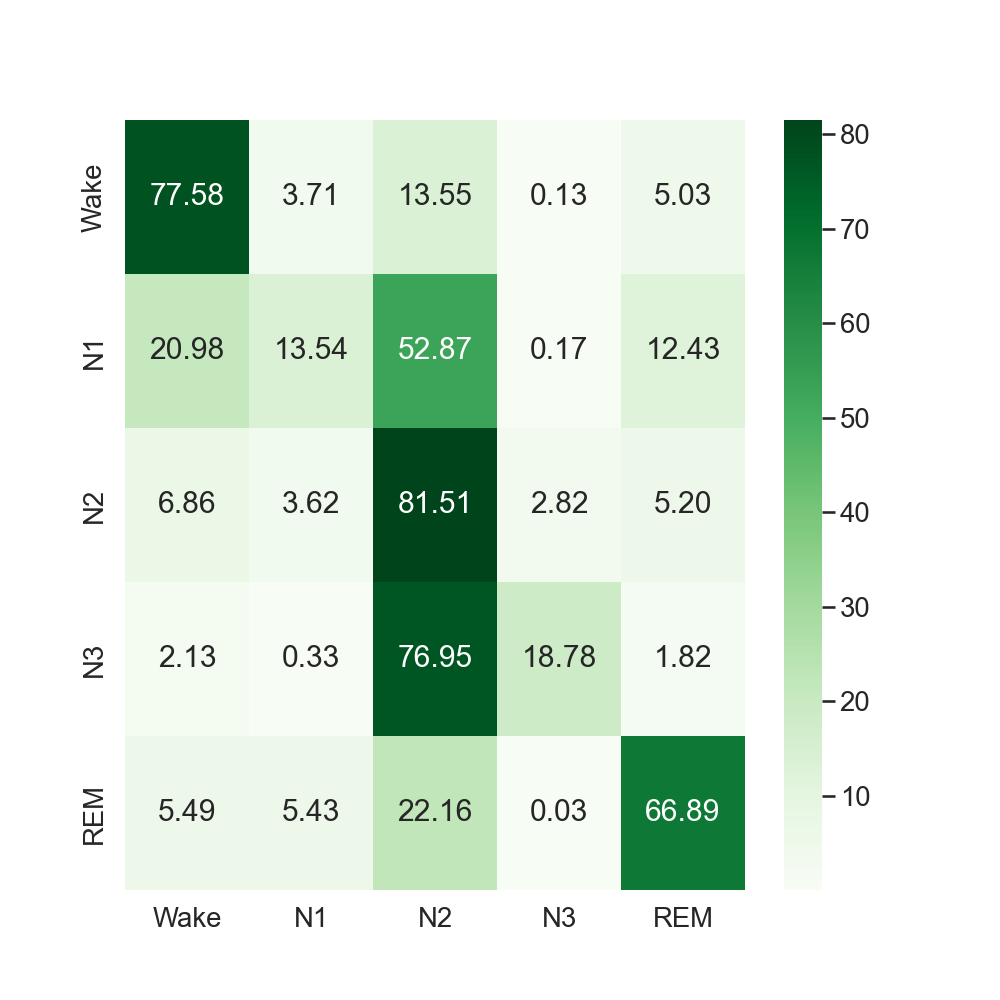

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(
    conf_matrix(
        conf_mat_5_mesa.rename(
            columns={"wake": "Wake", "n1": "N1", "n2": "N2", "n3": "N3", "rem": "REM"},
            index={"wake": "Wake", "n1": "N1", "n2": "N2", "n3": "N3", "rem": "REM"},
        )
    ),
    fmt=".2f",  # Change fmt to remove comma
    ax=ax,
    annot=True,
    cmap="Greens",
)
plt.savefig("Conf_mat_sleepstage_MESA_5stage.pdf", format="pdf", bbox_inches="tight")

## Radar - only

In [14]:
df = pd.read_csv(path.joinpath("LSTM", "LSTM_Radar_ACT_HRV_RRV_5stage_retrain_False.csv"), index_col=0, header=0)
df = df.drop("confusion_matrix")
df_5_rad_only = df.astype(dtype=np.float32)
df_5_rad_only

,44,19,34,38,22,40,28,18
metric,,,,,,,,
accuracy,0.503490,0.423188,0.462729,0.462604,0.505708,0.521197,0.370409,0.517748
precision,0.444311,0.423369,0.492102,0.452030,0.483748,0.425560,0.472428,0.564847
recall,0.503490,0.423188,0.462729,0.462604,0.505708,0.521197,0.370409,0.517748
f1,0.468346,0.421948,0.465834,0.451739,0.489750,0.457285,0.354943,0.503118
kappa,0.260261,0.180830,0.207015,0.225641,0.289955,0.261367,0.159177,0.329710
specificity,0.780871,0.785428,0.684146,0.776799,0.809848,0.759478,0.746957,0.828816
mcc,0.266477,0.182151,0.212144,0.232936,0.294068,0.276829,0.174176,0.347908


In [15]:
df_agg_5_rad_only = df_5_rad_only.agg(["median", lambda x: x.quantile(0.75) - x.quantile(0.25)], axis=1)
df_agg_5_rad_only.rename(columns={'<lambda>': 'iqr'}, inplace=True)  # Rename the row for clarity
df_agg_5_rad_only.loc[percent_indices] *= 100
df_agg_5_rad_only = df_agg_5_rad_only.round(decimals=2).applymap("{:,.2f}".format).applymap("{:0>4}".format)
df_agg_5_rad_only

/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_3433/115101443.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_agg_5_rad_only = df_agg_5_rad_only.round(decimals=2).applymap("{:,.2f}".format).applymap("{:0>4}".format)


,median,iqr
metric,,
accuracy,48.31,5.60
precision,46.22,4.62
recall,48.31,5.60
f1,46.16,2.94
kappa,0.24,0.07
specificity,77.88,3.52
mcc,0.25,0.08


In [16]:
conf_mat_5_rad_only = pd.read_csv(path.joinpath("LSTM", "confusion_matrix_LSTM_Radar_ACT_HRV_RRV_5stage_retrain_False.csv"),index_col= 0)
conf_mat_5_rad_only

,wake,n1,n2,n3,rem
wake,371.0,0.0,405.0,67.0,273.0
n1,115.0,0.0,203.0,37.0,148.0
n2,172.0,0.0,1913.0,440.0,629.0
n3,0.0,0.0,673.0,548.0,35.0
rem,174.0,0.0,261.0,44.0,411.0


In [17]:
conf_matrix(conf_mat_5_rad_only)

,wake,n1,n2,n3,rem
wake,33.24,0.0,36.29,6.00,24.46
n1,22.86,0.0,40.36,7.36,29.42
n2,5.45,0.0,60.65,13.95,19.94
n3,0.00,0.0,53.58,43.63,2.79
rem,19.55,0.0,29.33,4.94,46.18


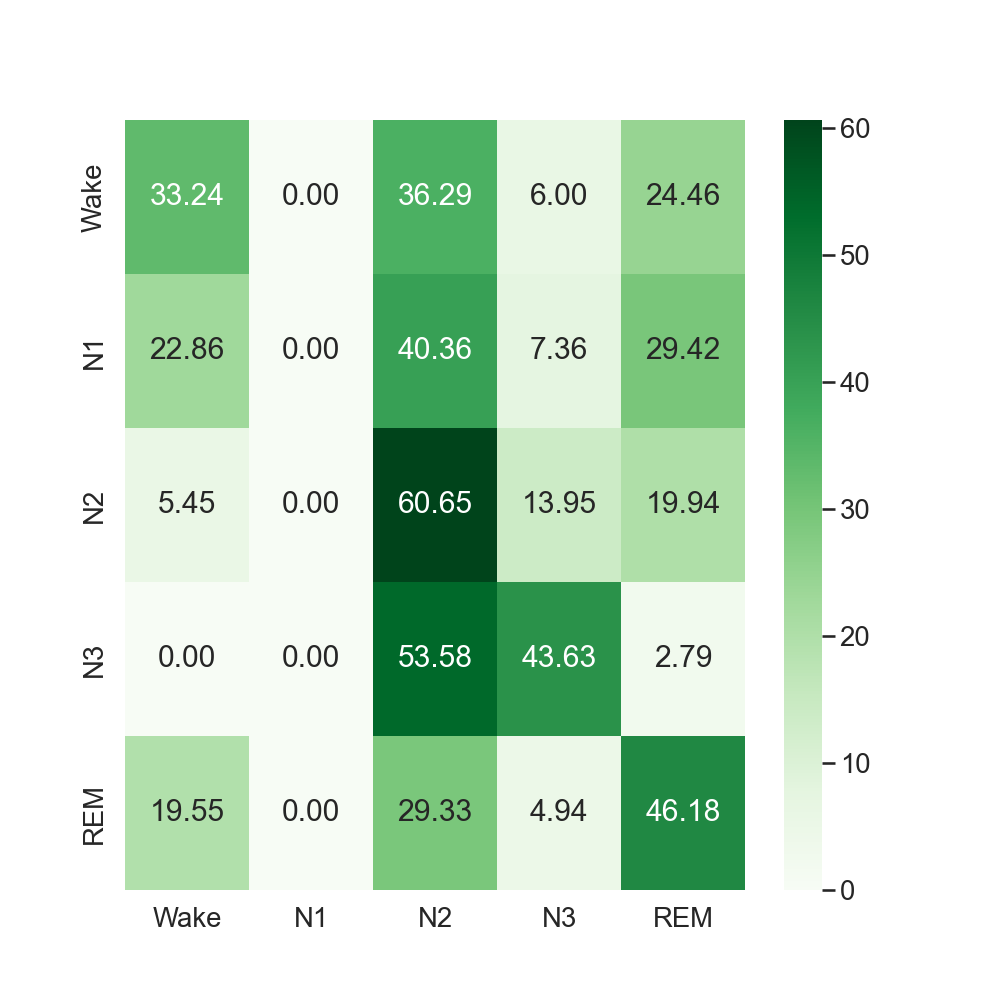

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(
    conf_matrix(
        conf_mat_5_rad_only.rename(
            columns={"wake": "Wake", "n1": "N1", "n2": "N2", "n3": "N3", "rem": "REM"},
            index={"wake": "Wake", "n1": "N1", "n2": "N2", "n3": "N3", "rem": "REM"},
        )
    ),
    fmt=",.2f",
    ax=ax,
    annot=True,
    cmap="Greens",
)
plt.savefig("Conf_mat_sleepstage_Radar_5stage_no_retrain.pdf", format="pdf", bbox_inches="tight")

## Radar retrained

In [19]:
df = pd.read_csv(path.joinpath("LSTM", "LSTM_Radar_ACT_HRV_RRV_5stage_retrain_True.csv"), index_col=0, header=0)
df = df.drop("confusion_matrix")
df_5_rad_retrain = df.astype(dtype=np.float32)
df_5_rad_retrain

,44,19,34,38,22,40,28,18
metric,,,,,,,,
accuracy,0.603190,0.596135,0.677918,0.666205,0.602740,0.679551,0.422875,0.625459
precision,0.645927,0.591661,0.708102,0.671440,0.576693,0.691234,0.423773,0.598495
recall,0.603190,0.596135,0.677918,0.666205,0.602740,0.679551,0.422875,0.625459
f1,0.571467,0.578189,0.683636,0.637343,0.578256,0.648573,0.376523,0.595394
kappa,0.427840,0.416576,0.510442,0.498172,0.425993,0.512916,0.178099,0.498963
specificity,0.830048,0.828769,0.808620,0.871827,0.854698,0.843188,0.782734,0.871666
mcc,0.438596,0.418993,0.519112,0.512254,0.432732,0.527392,0.190780,0.508313


In [20]:
df_agg_5_rad_retrain = df_5_rad_retrain.agg(["median", lambda x: x.quantile(0.75) - x.quantile(0.25)], axis=1)
df_agg_5_rad_retrain.rename(columns={'<lambda>': 'iqr'}, inplace=True)  # Rename the row for clarity
df_agg_5_rad_retrain.loc[percent_indices] *= 100
df_agg_5_rad_retrain = df_agg_5_rad_retrain.round(decimals=2).applymap("{:,.2f}".format).applymap("{:0>4}".format)
df_agg_5_rad_retrain

/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_3433/1703998866.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_agg_5_rad_retrain = df_agg_5_rad_retrain.round(decimals=2).applymap("{:,.2f}".format).applymap("{:0>4}".format)


,median,iqr
metric,,
accuracy,61.43,6.80
precision,62.22,8.85
recall,61.43,6.80
f1,58.68,6.36
kappa,0.46,0.08
specificity,83.66,3.52
mcc,0.47,0.08


In [21]:
conf_mat_5_rad_retrain = pd.read_csv(path.joinpath("LSTM", "confusion_matrix_LSTM_Radar_ACT_HRV_RRV_5stage_retrain_True.csv"),index_col= 0)
conf_mat_5_rad_retrain

,wake,n1,n2,n3,rem
wake,637.0,4.0,312.0,61.0,102.0
n1,156.0,7.0,213.0,11.0,116.0
n2,175.0,6.0,2237.0,391.0,345.0
n3,31.0,0.0,412.0,745.0,68.0
rem,77.0,0.0,260.0,7.0,546.0


In [22]:
conf_mat_5_rad_retrain.sum(axis=1)

wake    1116.0
n1       503.0
n2      3154.0
n3      1256.0
rem      890.0
dtype: float64

In [23]:
conf_mat_5_rad_retrain.sum(axis=1)/conf_mat_5_rad_retrain.sum(axis=1).sum()

wake    0.161295
n1      0.072698
n2      0.455846
n3      0.181529
rem     0.128631
dtype: float64

In [24]:
conf_matrix(conf_mat_5_rad_retrain)

,wake,n1,n2,n3,rem
wake,57.08,0.36,27.96,5.47,9.14
n1,31.01,1.39,42.35,2.19,23.06
n2,5.55,0.19,70.93,12.40,10.94
n3,2.47,0.00,32.80,59.32,5.41
rem,8.65,0.00,29.21,0.79,61.35


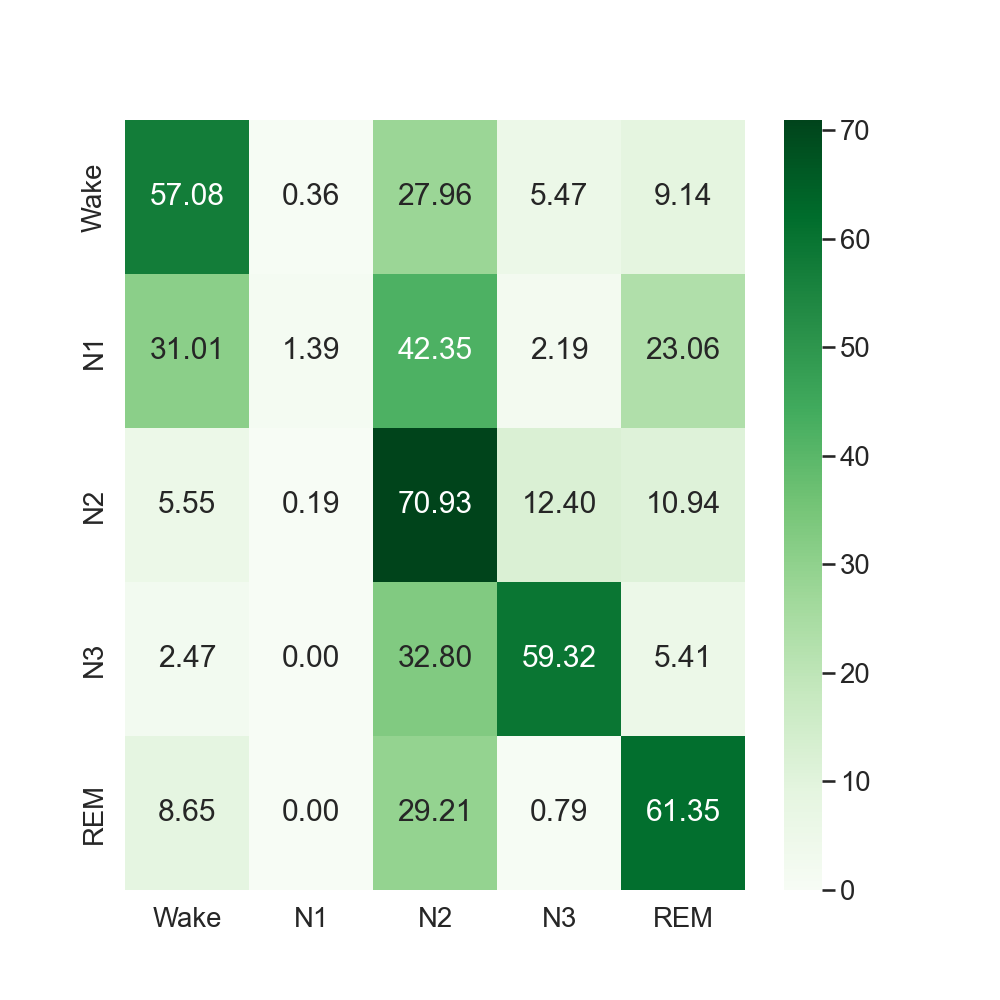

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(
    conf_matrix(
        conf_mat_5_rad_retrain.rename(
            columns={"wake": "Wake", "n1": "N1", "n2": "N2", "n3": "N3", "rem": "REM"},
            index={"wake": "Wake", "n1": "N1", "n2": "N2", "n3": "N3", "rem": "REM"},
        )
    ),
    fmt=",.2f",
    ax=ax,
    annot=True,
    cmap="Greens",
)
plt.savefig("Conf_mat_sleepstage_Radar_5stage_with_retrain.pdf", format="pdf", bbox_inches="tight")

# 3 Stage

## MESA

In [26]:
df = pd.read_csv(path.joinpath("LSTM", "LSTM_MESA_Sleep_ACT_HRV_RRV_3stage_retrain_False.csv"), index_col=0, header=0)
df = df.drop("confusion_matrix")
df_3_mesa = df.astype(dtype=np.float32)
df_3_mesa

,1497,0604,5864,6452,3257,5686,4029,1619,0797,1801,...,1321,6353,0070,5219,3440,2982,5328,3906,5167,4706
metric,,,,,,,,,,,,,,,,,,,,,
accuracy,0.710931,0.840525,0.783195,0.788168,0.819773,0.795987,0.885957,0.836024,0.580944,0.707015,...,0.609870,0.926486,0.664228,0.935666,0.894558,0.865641,0.893106,0.848847,0.808943,0.802315
precision,0.755970,0.838156,0.798186,0.804388,0.818873,0.814472,0.905612,0.864140,0.750050,0.815014,...,0.613192,0.926695,0.741115,0.937886,0.906946,0.868059,0.897876,0.861533,0.867961,0.824894
recall,0.710931,0.840525,0.783195,0.788168,0.819773,0.795987,0.885957,0.836024,0.580944,0.707015,...,0.609870,0.926486,0.664228,0.935666,0.894558,0.865641,0.893106,0.848847,0.808943,0.802315
f1,0.717355,0.838255,0.762116,0.792639,0.802764,0.803247,0.891139,0.825903,0.640384,0.730185,...,0.610085,0.925690,0.683447,0.935820,0.894616,0.861946,0.892854,0.848651,0.825708,0.797682
kappa,0.483917,0.711976,0.637236,0.643886,0.661222,0.649069,0.806098,0.686753,0.180279,0.467855,...,0.346371,0.849437,0.326020,0.892854,0.816974,0.764433,0.796708,0.746710,0.686731,0.583597
specificity,0.751550,0.889024,0.893080,0.825563,0.910950,0.856303,0.894848,0.926373,0.462198,0.629433,...,0.710261,0.932158,0.572885,0.958613,0.924230,0.926328,0.907996,0.889373,0.839144,0.755937
mcc,0.495133,0.713333,0.649128,0.647637,0.677977,0.650906,0.810909,0.713487,0.202633,0.507235,...,0.347156,0.850165,0.347702,0.893831,0.822641,0.769924,0.799131,0.751397,0.701487,0.592503


In [27]:
df_agg = df_3_mesa.agg(["median", lambda x: x.quantile(0.75) - x.quantile(0.25)], axis=1)
df_agg.rename(columns={'<lambda>': 'iqr'}, inplace=True)  # Rename the row for clarity
df_agg.loc[percent_indices] *= 100
df_agg = df_agg.round(decimals=2).applymap("{:,.2f}".format).applymap("{:0>4}".format)
df_agg

/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_3433/1608968568.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_agg = df_agg.round(decimals=2).applymap("{:,.2f}".format).applymap("{:0>4}".format)


,median,iqr
metric,,
accuracy,80.95,11.27
precision,83.01,8.68
recall,80.95,11.27
f1,81.16,11.48
kappa,0.66,0.20
specificity,85.26,12.32
mcc,0.67,0.19


In [28]:
conf_mat_3_mesa = pd.read_csv(path.joinpath("LSTM", "confusion_matrix_LSTM_MESA_Sleep_ACT_HRV_RRV_3stage_retrain_False.csv"),index_col= 0)

In [29]:
conf_mat_3_mesa

,wake,nrem,rem
wake,61398.0,12642.0,4155.0
nrem,13326.0,114054.0,10804.0
rem,2292.0,7989.0,21112.0


In [30]:
conf_matrix(conf_mat_3_mesa)

,wake,nrem,rem
wake,78.52,16.17,5.31
nrem,9.64,82.54,7.82
rem,7.30,25.45,67.25


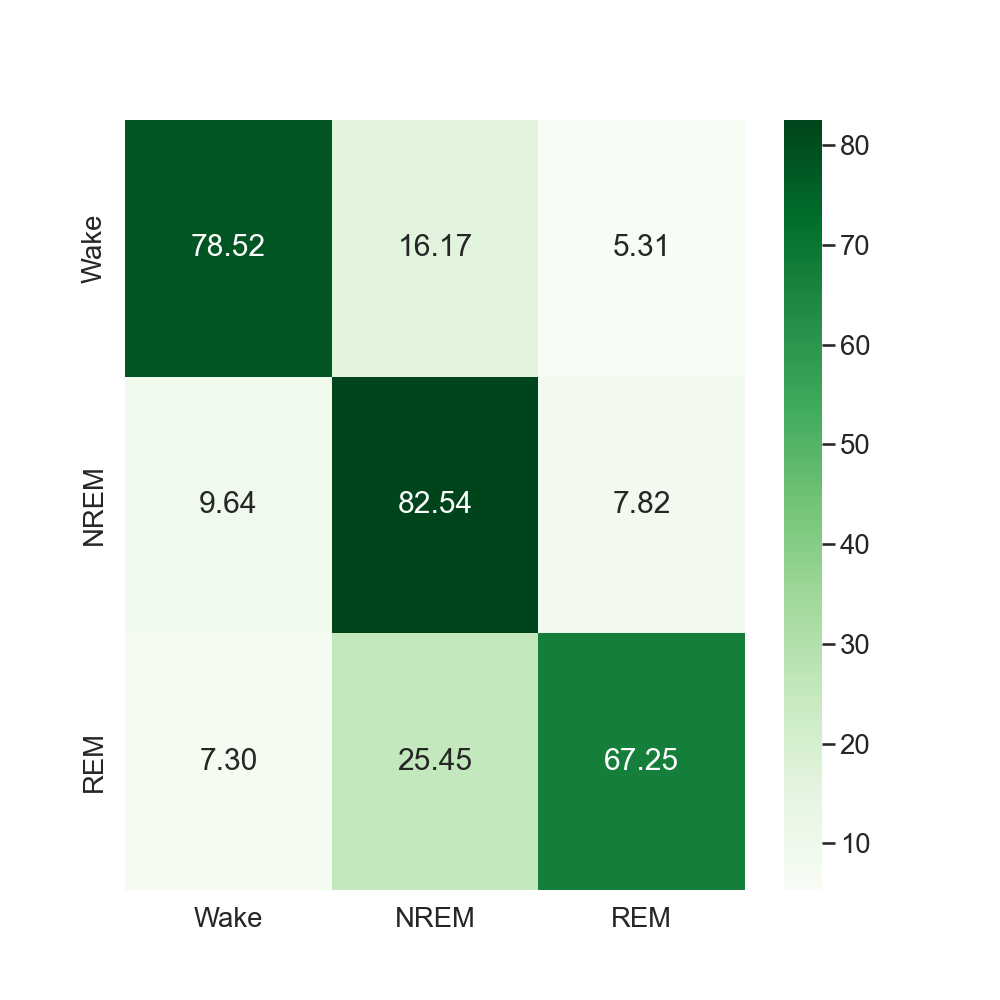

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(
    conf_matrix(
        conf_mat_3_mesa.rename(
            columns={"wake": "Wake", "nrem": "NREM", "rem": "REM"},
            index={"wake": "Wake", "nrem": "NREM", "rem": "REM"},
        )
    ),
    fmt=",.2f",
    ax=ax,
    annot=True,
    cmap="Greens",
)
plt.savefig("Conf_mat_sleepstage_MESA_3stage.pdf", format="pdf", bbox_inches="tight")

## Radar - only

In [32]:
df = pd.read_csv(path.joinpath("LSTM", "LSTM_Radar_ACT_HRV_RRV_3stage_retrain_False.csv"), index_col=0, header=0)
df = df.drop("confusion_matrix")
df_3_rad_only = df.astype(dtype=np.float32)
df_3_rad_only

,44,19,34,38,22,40,28,18
metric,,,,,,,,
accuracy,0.784646,0.652174,0.746835,0.563712,0.643836,0.745636,0.528856,0.856793
precision,0.826360,0.700099,0.798966,0.623601,0.768617,0.774804,0.615912,0.860446
recall,0.784646,0.652174,0.746835,0.563712,0.643836,0.745636,0.528856,0.856793
f1,0.799014,0.649814,0.766264,0.584844,0.692674,0.734834,0.548154,0.855703
kappa,0.527326,0.247583,0.354419,0.081659,0.384143,0.419914,0.189927,0.734163
specificity,0.695954,0.707914,0.498535,0.474401,0.649141,0.674958,0.527848,0.901224
mcc,0.538474,0.255692,0.366175,0.085378,0.405575,0.431391,0.204776,0.736242


In [33]:
df_agg = df_3_rad_only.agg(["median", lambda x: x.quantile(0.75) - x.quantile(0.25)], axis=1)
df_agg.rename(columns={'<lambda>': 'iqr'}, inplace=True)  # Rename the row for clarity
df_agg.loc[percent_indices] *= 100
df_agg = df_agg.round(decimals=2).applymap("{:,.2f}".format).applymap("{:0>4}".format)
df_agg

/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_3433/2160971020.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_agg = df_agg.round(decimals=2).applymap("{:,.2f}".format).applymap("{:0>4}".format)


,median,iqr
metric,,
accuracy,69.89,13.25
precision,77.17,12.48
recall,69.89,13.25
f1,71.38,14.09
kappa,0.37,0.21
specificity,66.20,17.84
mcc,0.39,0.22


In [34]:
conf_mat_3_rad_only = pd.read_csv(path.joinpath("LSTM", "confusion_matrix_LSTM_Radar_ACT_HRV_RRV_3stage_retrain_False.csv"),index_col= 0)
conf_mat_3_rad_only

,wake,nrem,rem
wake,529.0,487.0,100.0
nrem,434.0,3759.0,720.0
rem,231.0,181.0,478.0


In [35]:
conf_matrix(conf_mat_3_rad_only)

,wake,nrem,rem
wake,47.40,43.64,8.96
nrem,8.83,76.51,14.65
rem,25.96,20.34,53.71


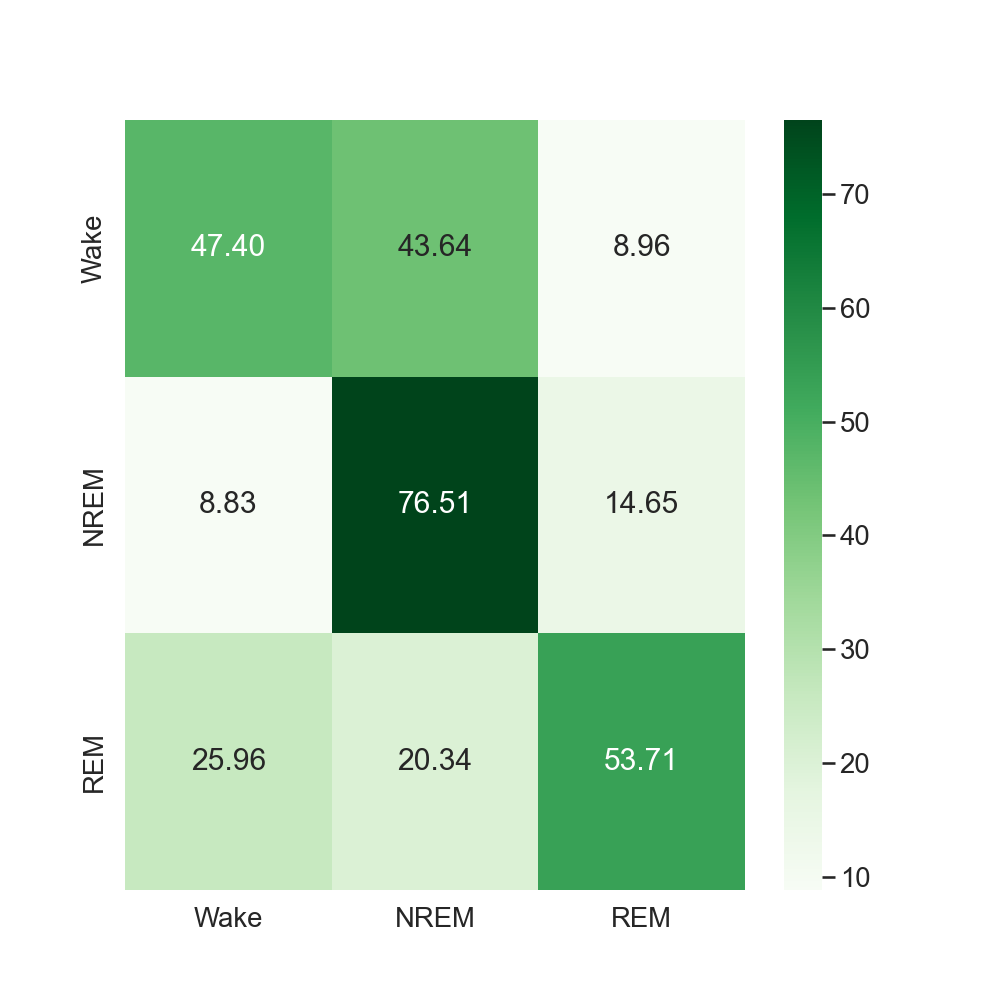

In [36]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(
    conf_matrix(
        conf_mat_3_rad_only.rename(
            columns={"wake": "Wake", "nrem": "NREM", "rem": "REM"},
            index={"wake": "Wake", "nrem": "NREM", "rem": "REM"},
        )
    ),
    fmt=",.2f",
    ax=ax,
    annot=True,
    cmap="Greens",
)
plt.savefig("Conf_mat_sleepstage_Radar_3stage_no_retrain.pdf", format="pdf", bbox_inches="tight")

## Radar retrained

In [37]:
df = pd.read_csv(path.joinpath("LSTM", "LSTM_Radar_ACT_HRV_RRV_3stage_retrain_True.csv"), index_col=0, header=0)
df = df.drop("confusion_matrix")
df_3_rad_retrain = df.astype(dtype=np.float32)
df_3_rad_retrain

,44,19,34,38,22,40,28,18
metric,,,,,,,,
accuracy,0.788634,0.768116,0.832630,0.819945,0.682648,0.793017,0.652676,0.784578
precision,0.797274,0.761094,0.846669,0.860183,0.700770,0.798249,0.651345,0.785173
recall,0.788634,0.768116,0.832630,0.819945,0.682648,0.793017,0.652676,0.784578
f1,0.792512,0.754744,0.838166,0.830455,0.691069,0.773377,0.637625,0.771530
kappa,0.491497,0.483203,0.513339,0.610547,0.367093,0.503118,0.251010,0.571893
specificity,0.720807,0.767067,0.665969,0.718750,0.668708,0.746926,0.599026,0.838524
mcc,0.492208,0.490350,0.515811,0.625567,0.367809,0.514771,0.256982,0.586380


In [38]:
df_agg_3_rad_retrain = df_3_rad_retrain.agg(["median", lambda x: x.quantile(0.75) - x.quantile(0.25)], axis=1)
df_agg_3_rad_retrain.rename(columns={'<lambda>': 'iqr'}, inplace=True)  # Rename the row for clarity
df_agg_3_rad_retrain.loc[percent_indices] *= 100
df_agg_3_rad_retrain = df_agg_3_rad_retrain.round(decimals=2).applymap("{:,.2f}".format).applymap("{:0>4}".format)
df_agg_3_rad_retrain

/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_3433/2399776500.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_agg_3_rad_retrain = df_agg_3_rad_retrain.round(decimals=2).applymap("{:,.2f}".format).applymap("{:0>4}".format)


,median,iqr
metric,,
accuracy,78.66,5.30
precision,79.12,6.43
recall,78.66,5.30
f1,77.25,6.32
kappa,0.50,0.07
specificity,71.98,8.39
mcc,0.50,0.07


In [39]:
conf_mat_3_rad_retrain = pd.read_csv(path.joinpath("LSTM", "confusion_matrix_LSTM_Radar_ACT_HRV_RRV_3stage_retrain_True.csv"),index_col= 0)
conf_mat_3_rad_retrain

,wake,nrem,rem
wake,588.0,436.0,92.0
nrem,312.0,4211.0,390.0
rem,75.0,347.0,468.0


In [40]:
conf_matrix(conf_mat_3_rad_retrain)

,wake,nrem,rem
wake,52.69,39.07,8.24
nrem,6.35,85.71,7.94
rem,8.43,38.99,52.58


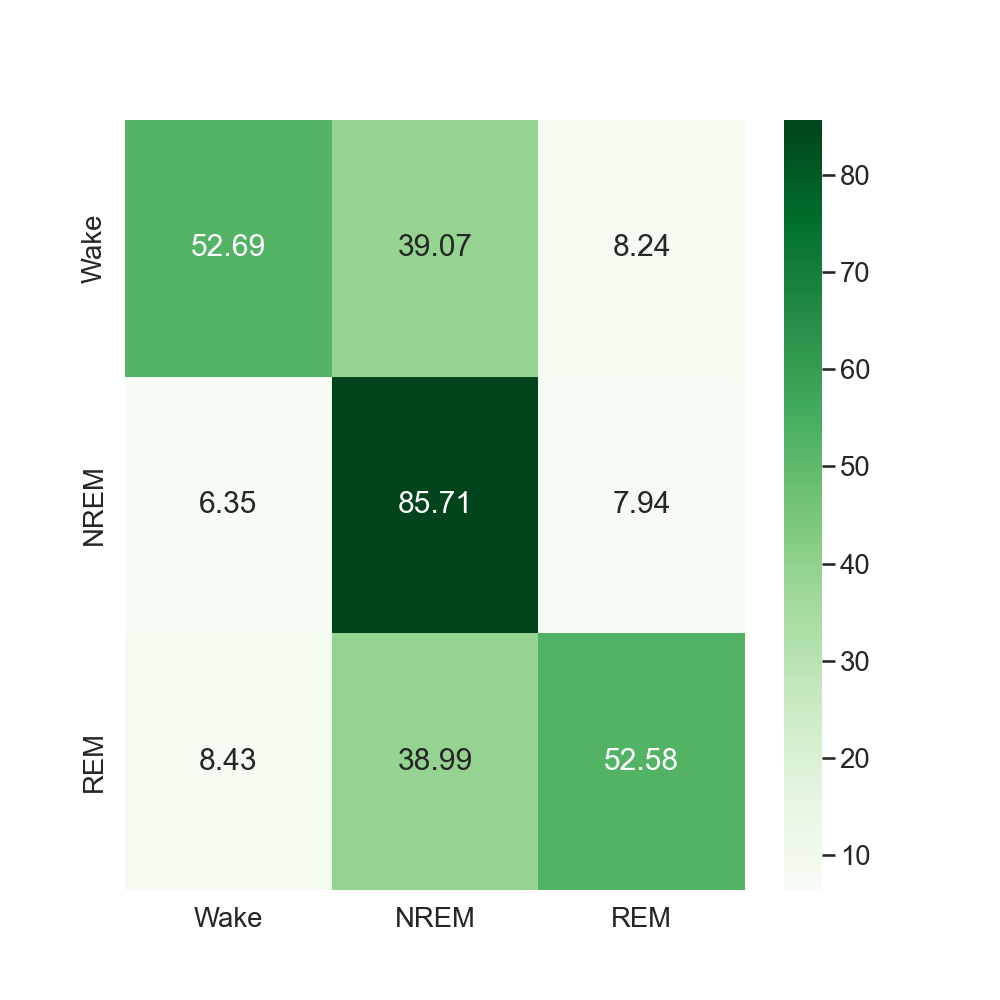

In [41]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(
    conf_matrix(
        conf_mat_3_rad_retrain.rename(
            columns={"wake": "Wake", "nrem": "NREM", "rem": "REM"},
            index={"wake": "Wake", "nrem": "NREM", "rem": "REM"},
        )
    ),
    fmt=",.2f",
    ax=ax,
    annot=True,
    cmap="Greens",
)
plt.savefig("Conf_mat_sleepstage_Radar_3stage_with_retrain.pdf", format="pdf", bbox_inches="tight")

In [42]:
df_5_mesa = melt_dataframe(df_5_mesa, 'MESA Dataset')
df_5_rad_only = melt_dataframe(df_5_rad_only, 'Radar-only')
df_5_rad_retrain = melt_dataframe(df_5_rad_retrain, 'Transfer Learning')

In [43]:
df_combined_5 = pd.concat([df_5_mesa, df_5_rad_only, df_5_rad_retrain])

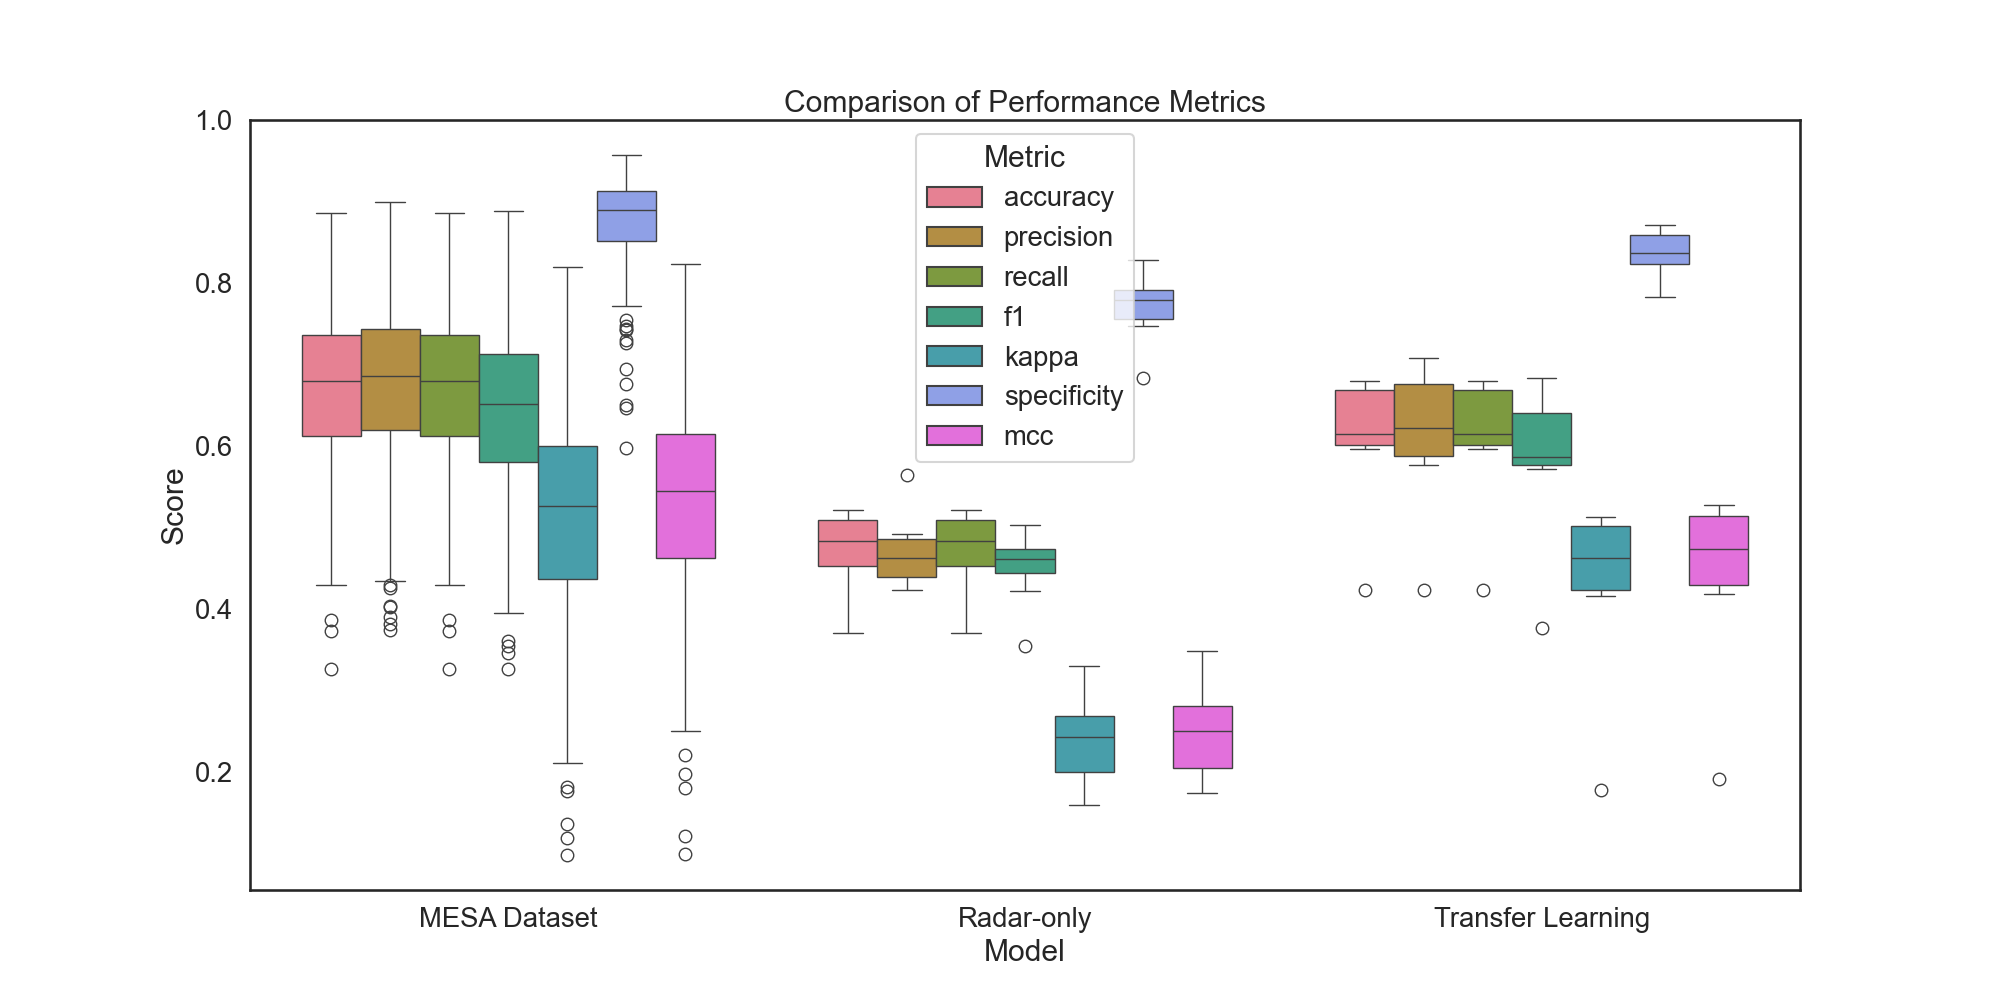

In [44]:
fig, ax = plt.subplots(figsize=(20,10))
g = sns.boxplot(x='Model', y='value', hue='metric', data=df_combined_5)
g.set(title='Comparison of Performance Metrics', ylabel='Score')
plt.legend(title='Metric')
plt.show()

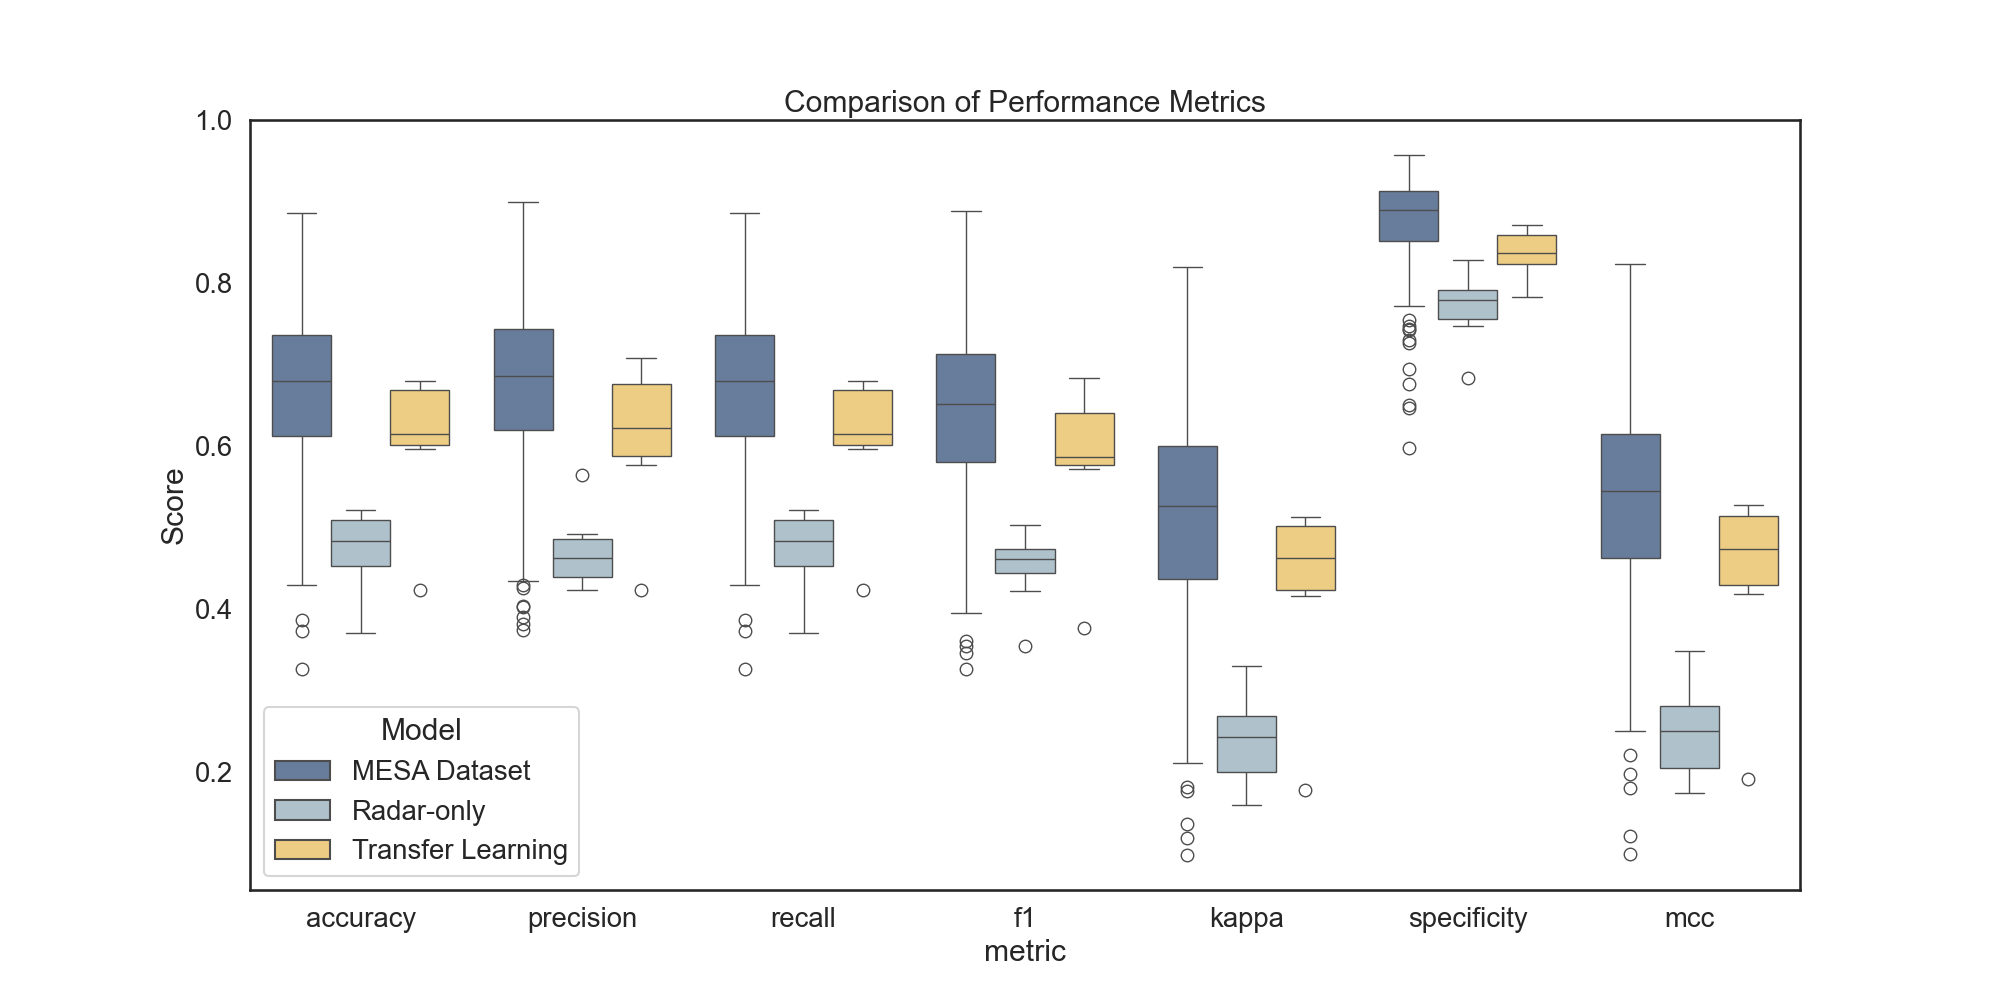

In [45]:
fig, ax = plt.subplots(figsize=(20,10))

g = sns.boxplot(x='metric', y='value', hue='Model', data=df_combined_5)
g.set(title='Comparison of Performance Metrics', ylabel='Score')
plt.legend(title='Model')
plt.show()

In [46]:
df_3_mesa = melt_dataframe(df_3_mesa, 'MESA Dataset')
df_3_rad_only = melt_dataframe(df_3_rad_only, 'Radar-only')
df_3_rad_retrain = melt_dataframe(df_3_rad_retrain, 'Transfer Learning')

In [47]:
df_combined_3 = pd.concat([df_3_mesa, df_3_rad_only, df_3_rad_retrain])

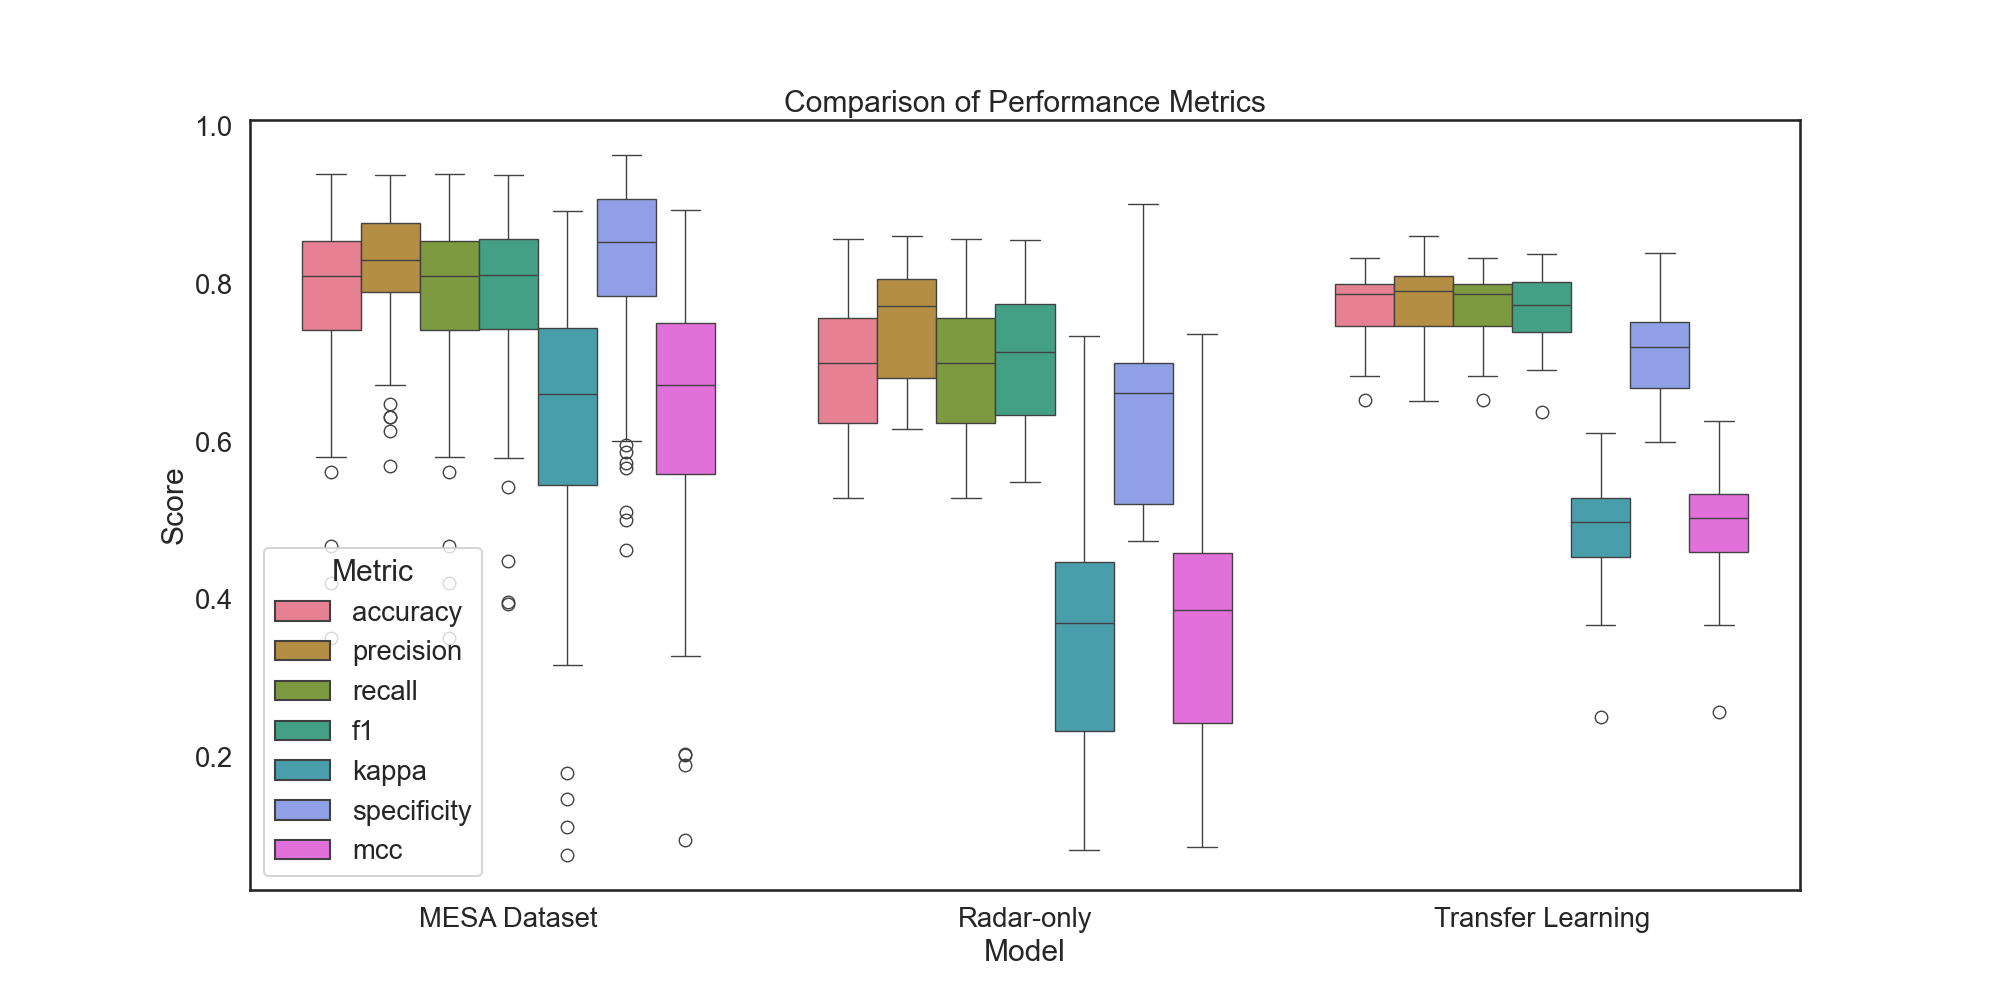

In [48]:
fig, ax = plt.subplots(figsize=(20,10))
g = sns.boxplot(x='Model', y='value', hue='metric', data=df_combined_3)
g.set(title='Comparison of Performance Metrics', ylabel='Score')
plt.legend(title='Metric')
plt.show()

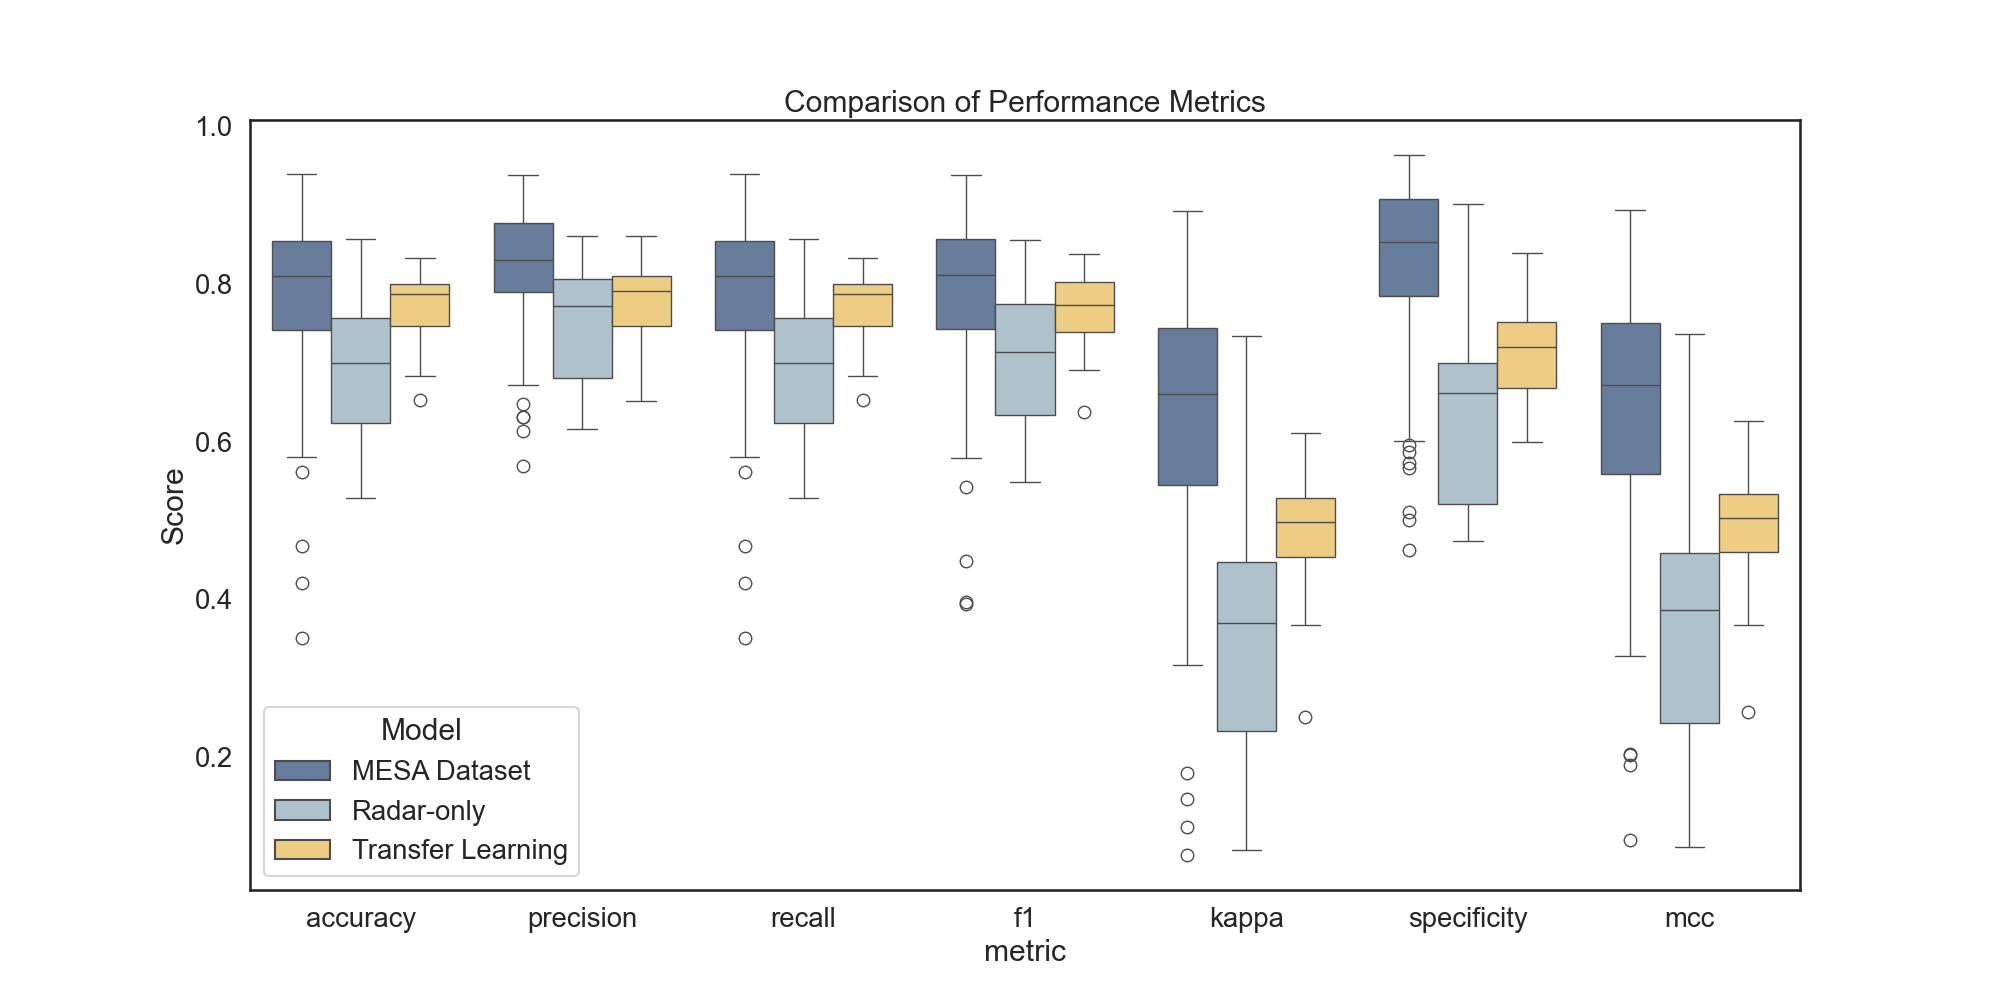

In [49]:
fig, ax = plt.subplots(figsize=(20,10))

g = sns.boxplot(x='metric', y='value', hue='Model', data=df_combined_3)
g.set(title='Comparison of Performance Metrics', ylabel='Score')
plt.legend(title='Model')
plt.show()

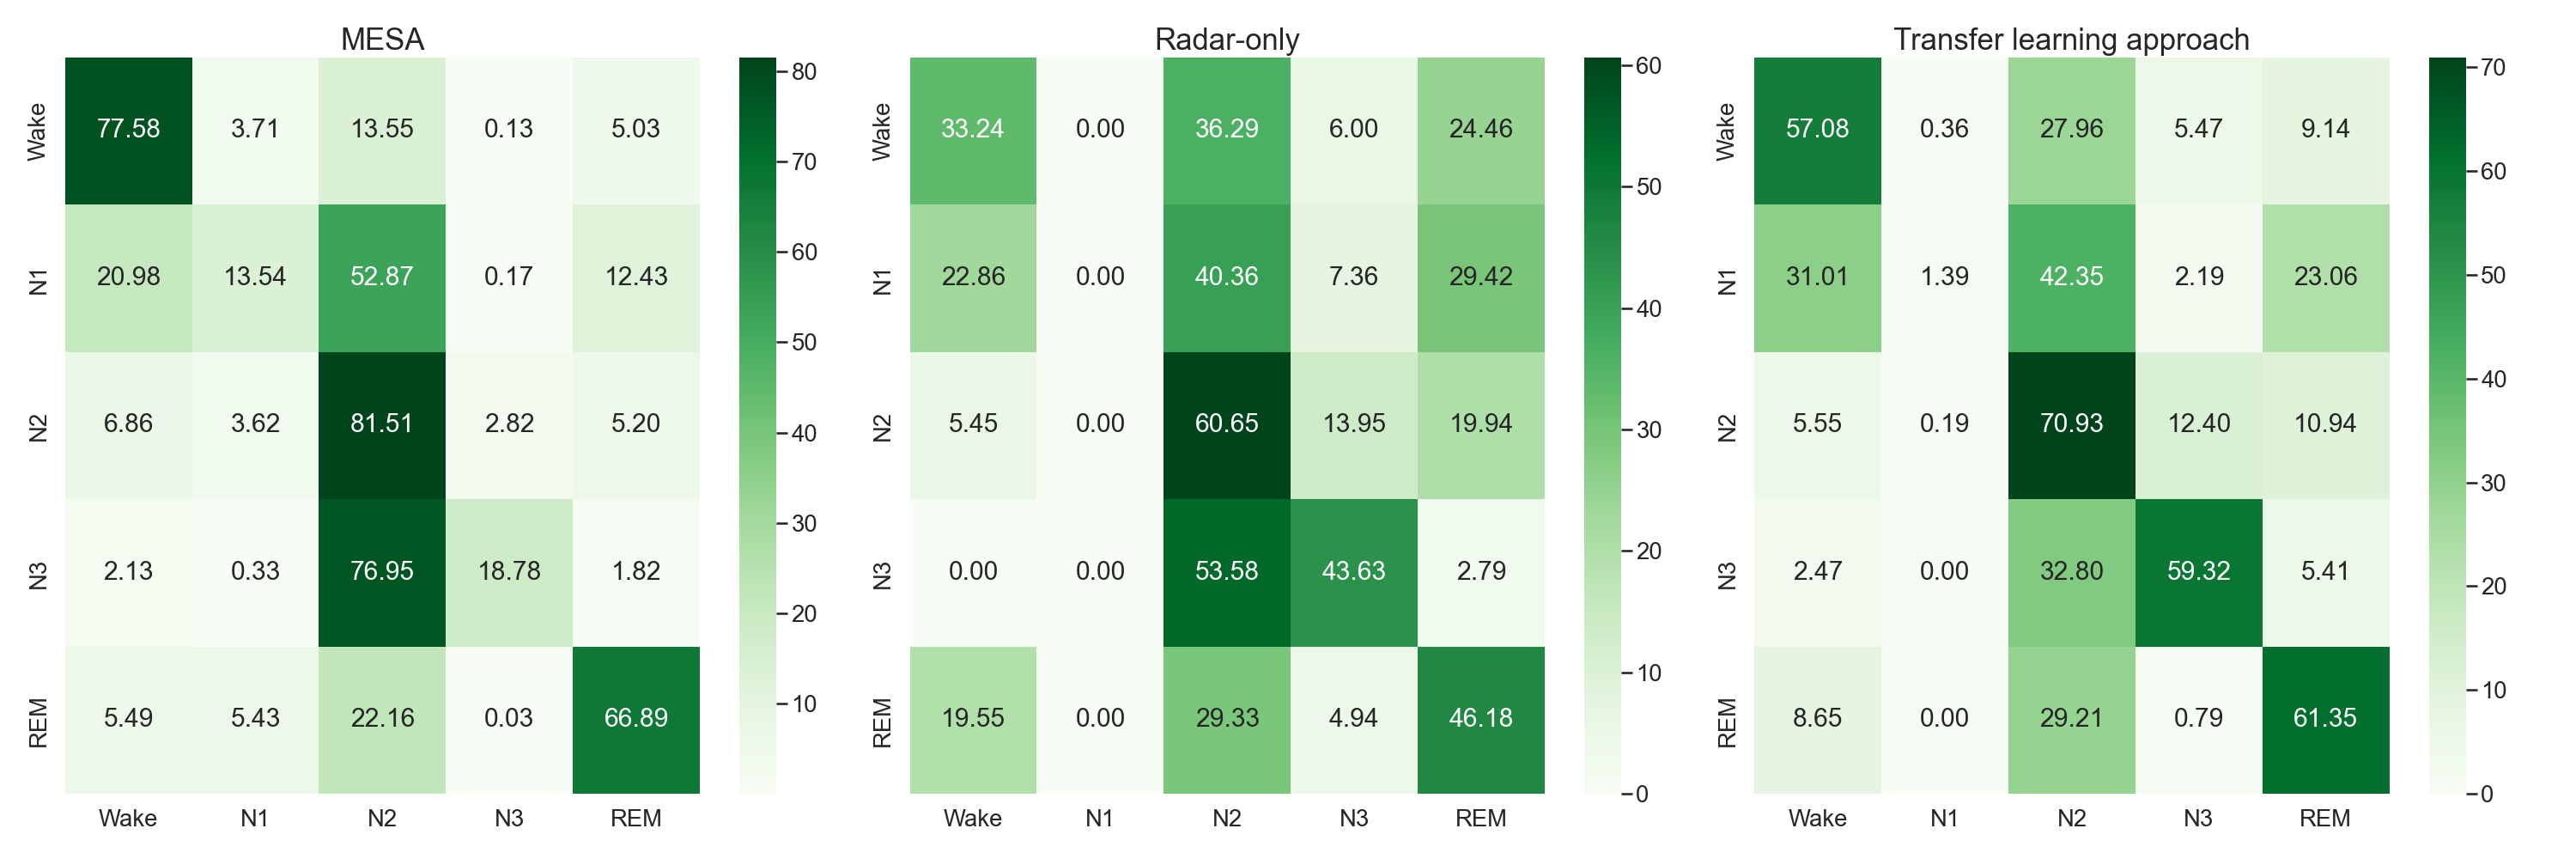

In [50]:
fig, axs = plt.subplots(ncols=3, figsize=(30, 10))
sns.heatmap(
    conf_matrix(
        conf_mat_5_mesa.rename(
            columns={"wake": "Wake", "n1": "N1", "n2": "N2", "n3": "N3", "rem": "REM"},
            index={"wake": "Wake", "n1": "N1", "n2": "N2", "n3": "N3", "rem": "REM"},
        )
    ),
    fmt=",.2f",
    ax=axs[0],
    annot=True,
    cmap="Greens",
)

sns.heatmap(
    conf_matrix(
        conf_mat_5_rad_only.rename(
            columns={"wake": "Wake", "n1": "N1", "n2": "N2", "n3": "N3", "rem": "REM"},
            index={"wake": "Wake", "n1": "N1", "n2": "N2", "n3": "N3", "rem": "REM"},
        )
    ),
    fmt=",.2f",
    ax=axs[1],
    annot=True,
    cmap="Greens",
)

sns.heatmap(
    conf_matrix(
        conf_mat_5_rad_retrain.rename(
            columns={"wake": "Wake", "n1": "N1", "n2": "N2", "n3": "N3", "rem": "REM"},
            index={"wake": "Wake", "n1": "N1", "n2": "N2", "n3": "N3", "rem": "REM"},
        )
    ),
    fmt=",.2f",
    ax=axs[2],
    annot=True,
    cmap="Greens",
)
axs[0].set_title("MESA", fontsize=25)
axs[1].set_title("Radar-only", fontsize=25)
axs[2].set_title("Transfer learning approach", fontsize=25)

plt.tight_layout()
plt.savefig("conf_mat_5_stage.pdf")

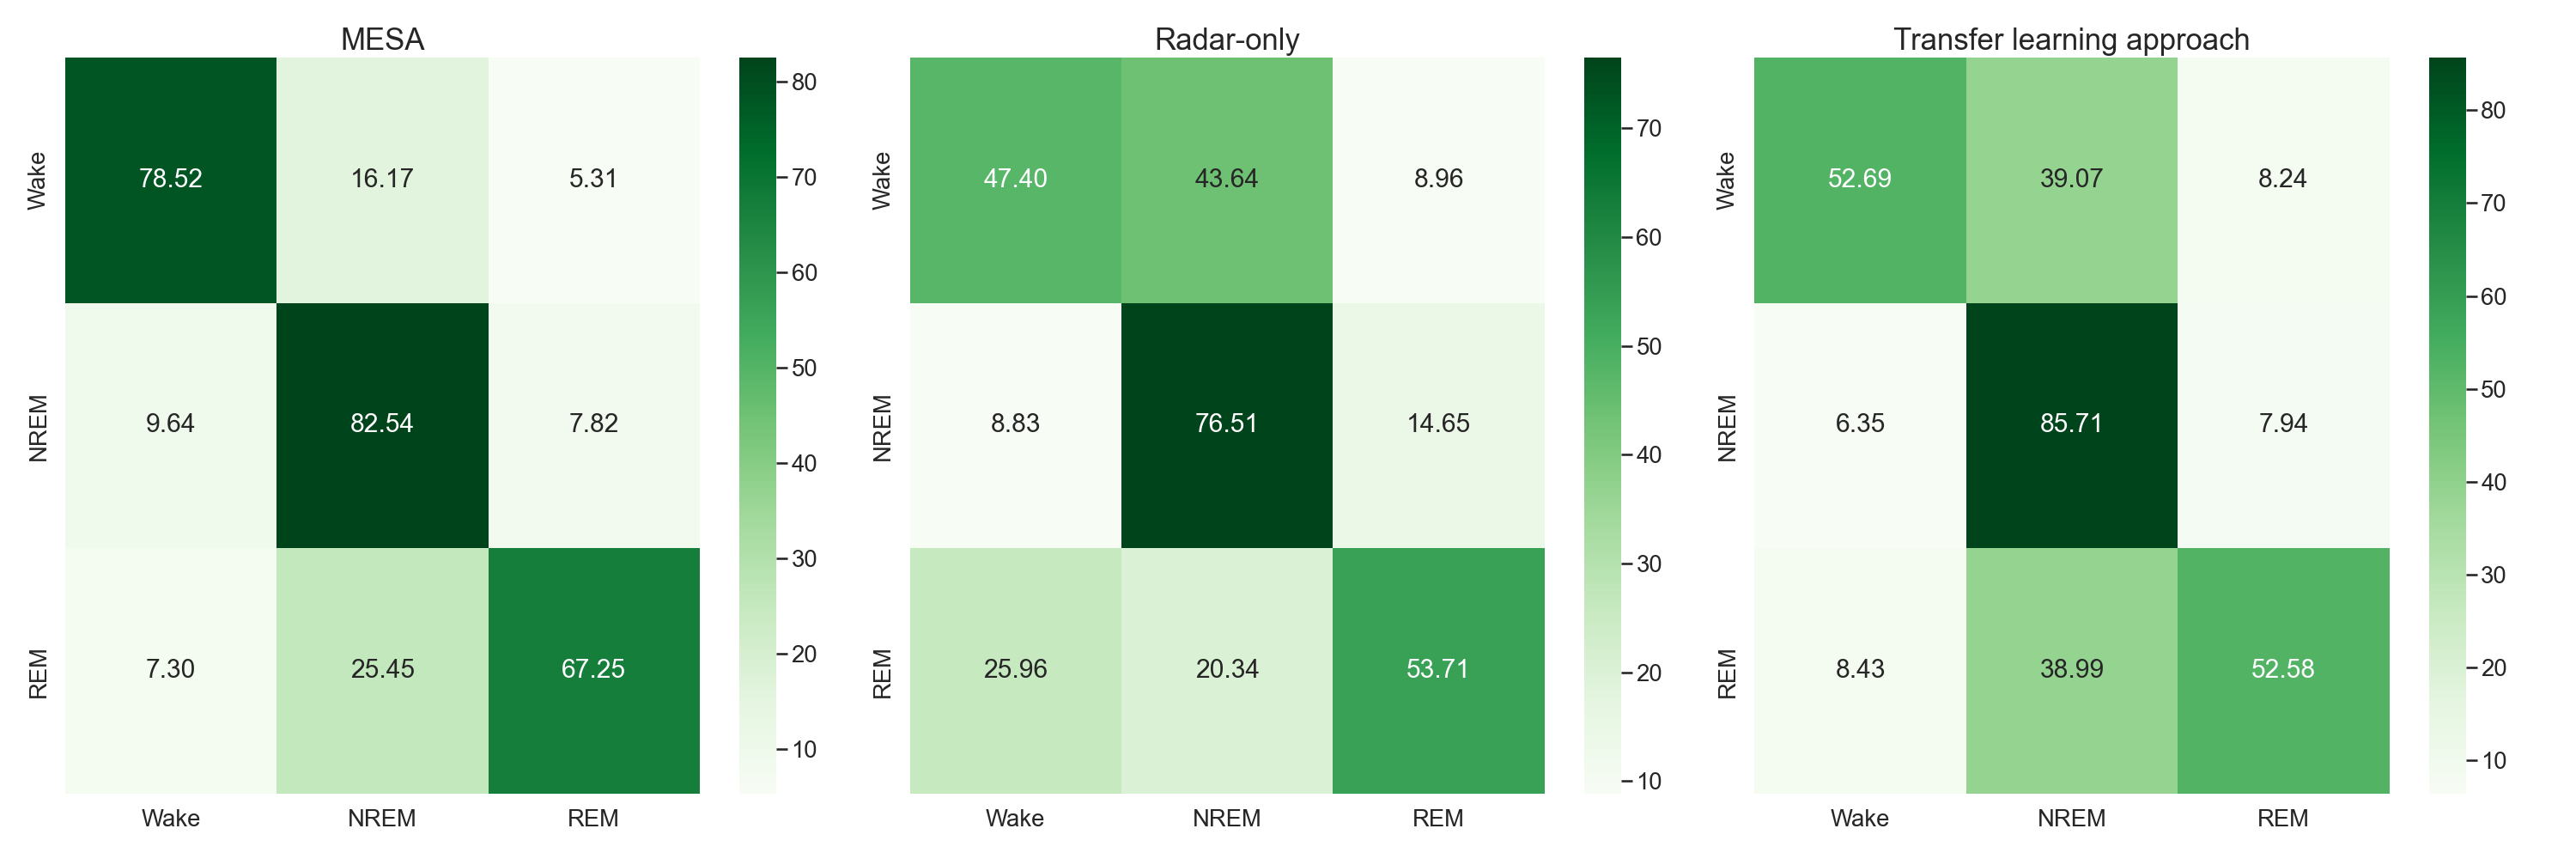

In [51]:
fig, axs = plt.subplots(ncols=3, figsize=(30, 10))
sns.heatmap(
    conf_matrix(
        conf_mat_3_mesa.rename(
            columns={"wake": "Wake", "nrem": "NREM", "rem": "REM"},
            index={"wake": "Wake", "nrem": "NREM", "rem": "REM"},
        )
    ),
    fmt=",.2f",
    ax=axs[0],
    annot=True,
    cmap="Greens",
)

sns.heatmap(
    conf_matrix(
        conf_mat_3_rad_only.rename(
            columns={"wake": "Wake", "nrem": "NREM", "rem": "REM"},
            index={"wake": "Wake", "nrem": "NREM", "rem": "REM"},
        )
    ),
    fmt=",.2f",
    ax=axs[1],
    annot=True,
    cmap="Greens",
)

sns.heatmap(
    conf_matrix(
        conf_mat_3_rad_retrain.rename(
            columns={"wake": "Wake", "nrem": "NREM", "rem": "REM"},
            index={"wake": "Wake", "nrem": "NREM", "rem": "REM"},
        )
    ),
    fmt=",.2f",
    ax=axs[2],
    annot=True,
    cmap="Greens",
)
axs[0].set_title("MESA", fontsize=25)
axs[1].set_title("Radar-only", fontsize=25)
axs[2].set_title("Transfer learning approach", fontsize=25)

plt.tight_layout()
plt.savefig("conf_mat_3_stage.pdf")

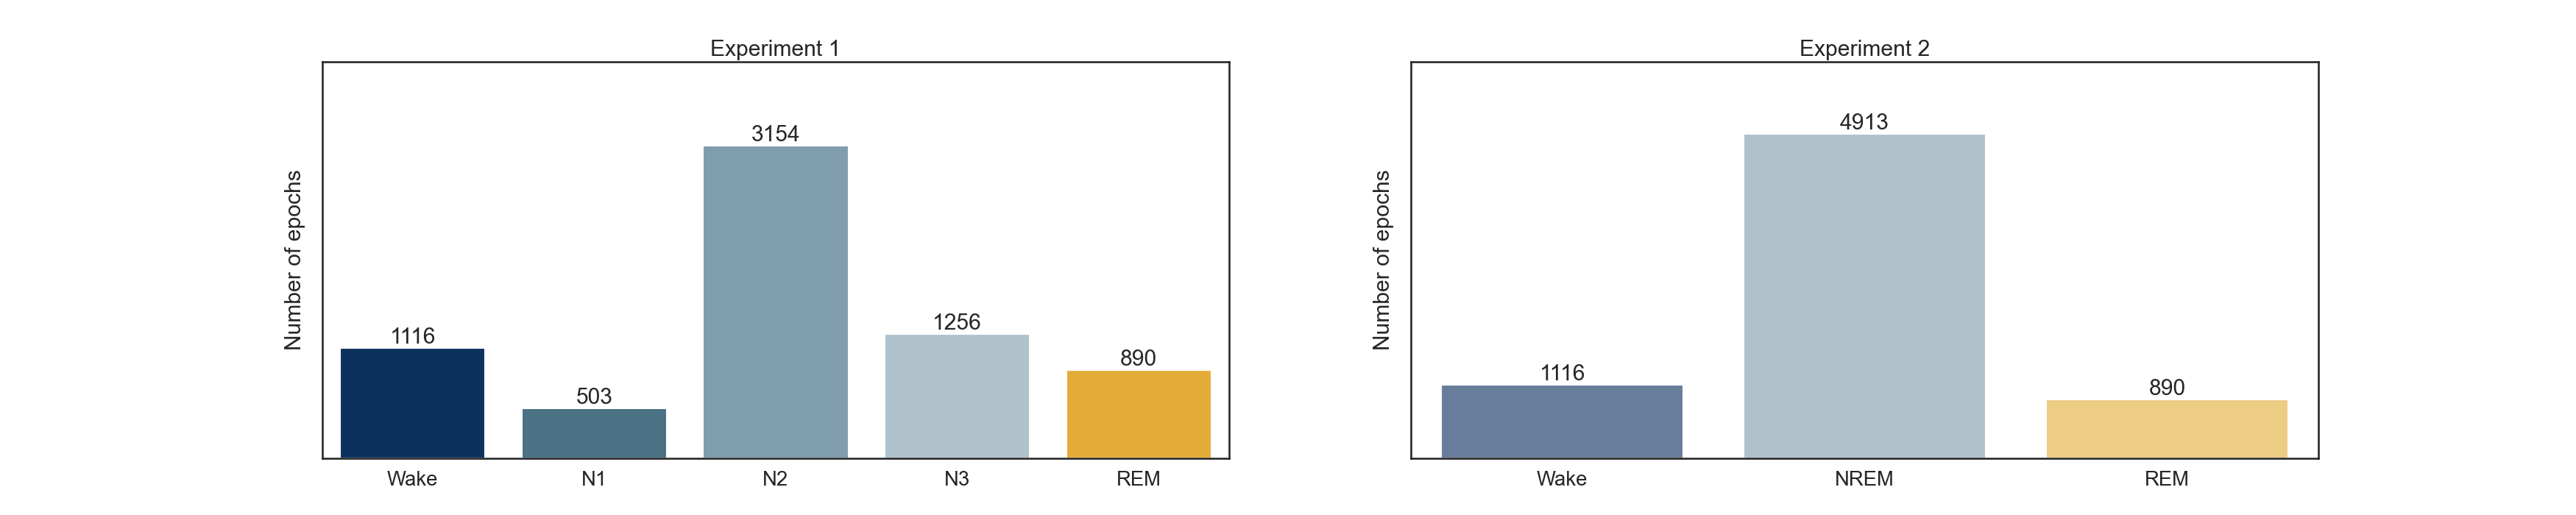

In [52]:
five_count = pd.read_csv(path.joinpath("LSTM", "confusion_matrix_LSTM_Radar_ACT_HRV_RRV_5stage_retrain_False.csv"),index_col= 0).sum(axis=1)
three_count = pd.read_csv(path.joinpath("LSTM", "confusion_matrix_LSTM_Radar_ACT_HRV_RRV_3stage_retrain_False.csv"),index_col= 0).sum(axis=1)

fig, ax = plt.subplots(ncols=2, figsize=(35, 7))
sns.barplot(
    pd.DataFrame(five_count).T.rename(columns={"wake":"Wake", "n1":"N1", "n2":"N2", "n3":"N3", "rem":"REM"}),
    ax=ax[0],
    palette=["#002F6C", "#41748D", "#779FB5", "#AAC3D1", "#FFB81C"],
)
sns.barplot(pd.DataFrame(three_count).T.rename(columns={"wake":"Wake", "nrem":"NREM", "rem":"REM"}), ax=ax[1])
ax[0].set_ylim(0, 4000)
ax[0].set(yticklabels=[])  # remove the tick labels
ax[0].set_ylabel("Number of epochs")
ax[0].set_title("Experiment 1")
ax[1].set_ylim(0, 6000)
ax[1].set(yticklabels=[])  # remove the tick labels
ax[1].set_ylabel("Number of epochs")
ax[1].set_title("Experiment 2")



for i in ax[0].containers:
    ax[0].bar_label(
        i,
    )
for i in ax[1].containers:
    ax[1].bar_label(
        i,
    )


plt.savefig("sleep_phases.pdf", format="pdf", bbox_inches="tight")

In [53]:
ax[0].containers

[<BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>]

/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_3433/421169456.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=df.index, y=df["Count"], ax=ax, palette=colors)
/var/folders/kr/z18bsf7n4xsf9cd__hgnn7lh0000gn/T/ipykernel_3433/421169456.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=df.index, y=df["Count"], ax=ax, palette=colors)


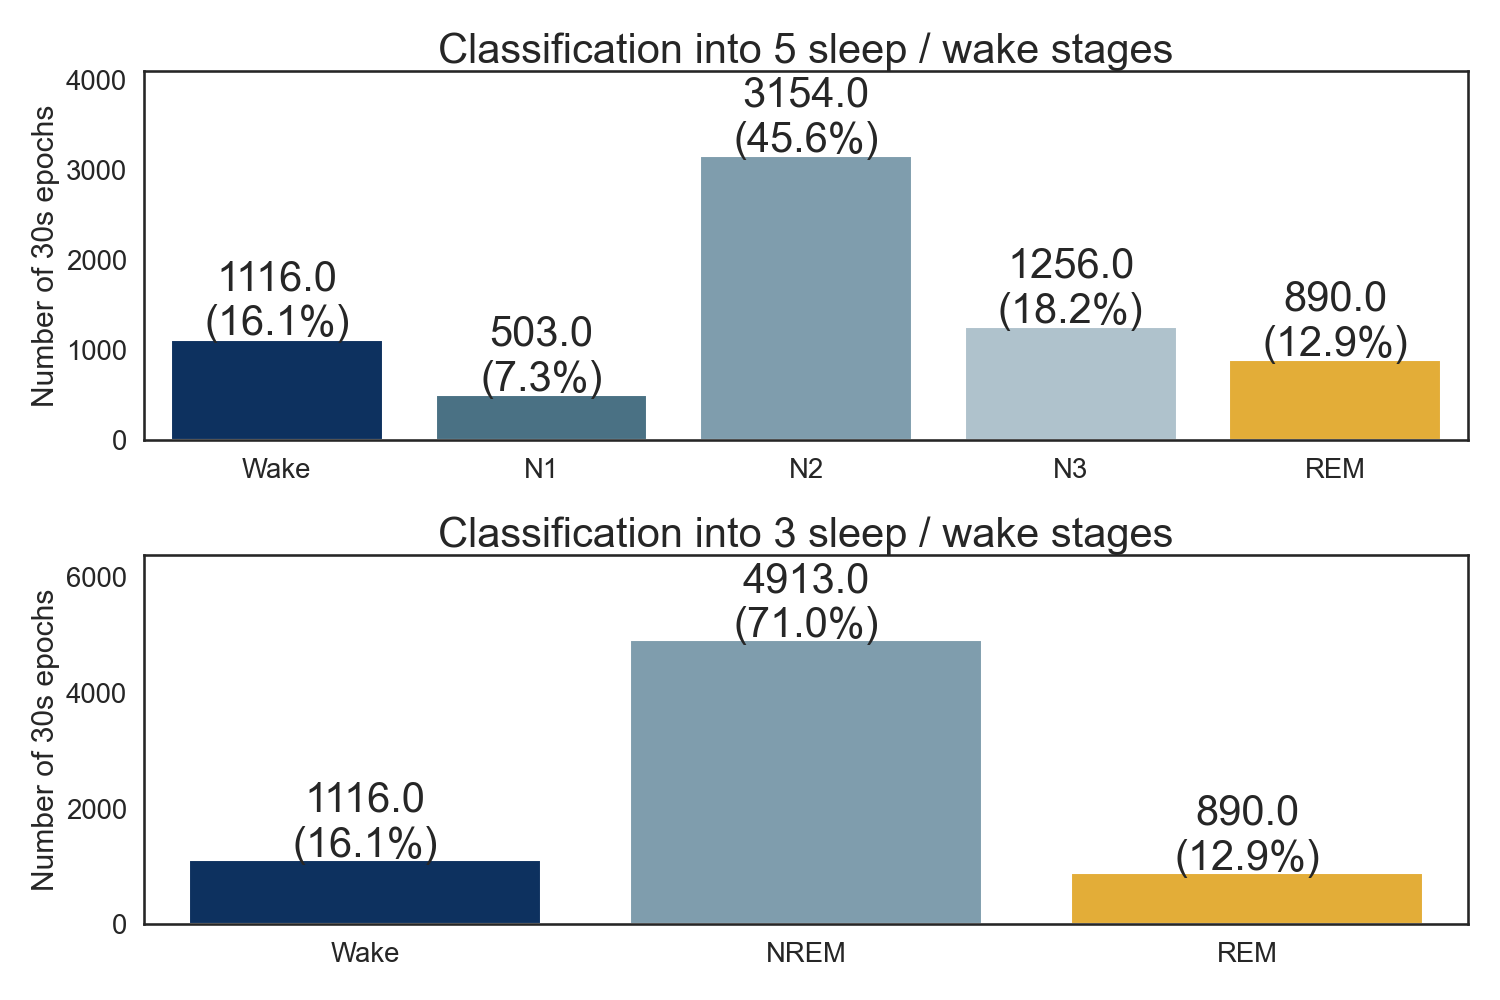

In [64]:

# Load confusion matrix data
five_count = pd.read_csv(path.joinpath("LSTM", "confusion_matrix_LSTM_Radar_ACT_HRV_RRV_5stage_retrain_False.csv"),index_col= 0).sum(axis=1)
three_count = pd.read_csv(path.joinpath("LSTM", "confusion_matrix_LSTM_Radar_ACT_HRV_RRV_3stage_retrain_False.csv"),index_col= 0).sum(axis=1)

# Rename columns for clarity
five_count = five_count.rename(index={"wake": "Wake", "n1": "N1", "n2": "N2", "n3": "N3", "rem": "REM"})
three_count = three_count.rename(index={"wake": "Wake", "nrem": "NREM", "rem": "REM"})

# Convert to DataFrame
five_df = pd.DataFrame(five_count, columns=["Count"])
three_df = pd.DataFrame(three_count, columns=["Count"])

# Compute percentages
five_df["Percentage"] = five_df["Count"] / five_df["Count"].sum() * 100
three_df["Percentage"] = three_df["Count"] / three_df["Count"].sum() * 100

# Plot settings
fig, axes = plt.subplots(nrows=2, figsize=(15, 10))

def plot_bar(ax, df, title, colors):
    bars = sns.barplot(x=df.index, y=df["Count"], ax=ax, palette=colors)
    ax.set_ylim(0, df["Count"].max() * 1.3)
    ax.set_ylabel("Number of 30s epochs")
    ax.set_xlabel("")
    ax.set_title(title, fontsize=30)
    
    # Annotate bars with values
    for bar, count, percent in zip(bars.patches, df["Count"], df["Percentage"]):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50,
                f"{count}\n({percent:.1f}%)", ha='center', fontsize=30)

# Define colors
five_colors = ["#002F6C", "#41748D", "#779FB5", "#AAC3D1", "#FFB81C"]
three_colors = ["#002F6C", "#779FB5", "#FFB81C"]

# Create plots
plot_bar(axes[0], five_df, "Classification into 5 sleep / wake stages", five_colors)
plot_bar(axes[1], three_df, "Classification into 3 sleep / wake stages", three_colors)

plt.tight_layout()
plt.show()
plt.savefig("sleep_phases.pdf")


In [ ]:
conf_mat_5_mesa.sum(axis=0)

In [ ]:
conf_mat_5_rad_only.sum(axis=0)

In [ ]:
conf_mat_5_rad_retrain.sum(axis=0)

# Statistics

In [ ]:
from biopsykit.stats import StatsPipeline

## 5 Stage

In [ ]:
df_combined_5 = df_combined_5.set_index(["Model", "subject", "metric"])

In [ ]:
#df_combined_5 = df_combined_5.loc[["Transfer Learning", "Radar-only"]]

In [ ]:
df_combined_5 = df_combined_5.rename(index={"specifity": "specificity"})
df_combined_5 = df_combined_5.unstack("metric").astype(float)
df_combined_5.loc[:, ("value", ["accuracy", "recall", "precision", "specificity", "f1"])] *= 100
df_combined_5 = df_combined_5.stack("metric")

In [ ]:
dict_stats = {}

for metric in ["accuracy", "mcc", "f1"]:
    steps = [
        # ("prep", "normality"),
        # ("test", "pairwise_ttests")
        ("test", "kruskal"),
        ("posthoc", "pairwise_tests"),
    ]

    params = {
        "dv": "value",
        "between": "Model",
        # "subject": "subject",
        #"groupby": ["algorithm"],
        "parametric": False,
        # "multicomp": {"levels": ["algorithm"]},
    }

    df_slice = df_combined_5.xs(metric, level="metric")
    pipeline = StatsPipeline(steps, params, round=4)
    pipeline.apply(df_slice)

    dict_stats[metric] = pipeline

dict_stats["mcc"].display_results()

In [ ]:
dict_brackets = {
    key: dict_stats[key].sig_brackets(
        "posthoc", stats_type="between", plot_type="single", x="Model", stats_effect_type="between"
    )
    for key in ["accuracy", "mcc", "f1"]
}

In [ ]:
box_pairs = {key: val[0] for key, val in dict_brackets.items()}
pvalues = {key: val[1] for key, val in dict_brackets.items()}

In [ ]:
box_pairs

In [ ]:
pvalues

In [ ]:
fig, axs = plt.subplots(figsize=(17, 7), ncols=3)

features = ["accuracy", "mcc", "f1"]


fig, axs = bp.plotting.multi_feature_boxplot(
    data=df_combined_5,
    x="Model",
    y="value",
    hue="Model",
    #hue_order=["ACT", "ACT + HRV", "ACT + HRV + RRV", "ACT + HRV + ED-RRV"],
    group="metric",
    features=features,
    stats_kwargs={
        #"box_pairs": box_pairs,
        #"pvalues": pvalues,
        "fontsize": "medium",
        "text_offset": -6,
        "verbose": False,
    },
    ylabels={"accuracy": "Accuracy [%]", "mcc": "Matthews's correlation coefficient", "f1": "F1-score [%]"},
    axs=axs,
)
fig.tight_layout(rect=(0, 0, 1, 0.95), pad=1.5)
handles, labels = axs[0].get_legend_handles_labels()

for ax, metric in zip(axs, features):
    ax.legend().remove()
    #ax.set_xlabel("Algorithm")
    ax.tick_params(reset=True, right=False, top=False, bottom=False, labelbottom=False)

    ax.set_xlabel("")


fig.legends[0].remove()
plt.legend(ncol=3, bbox_to_anchor=(0.25, 1.18))

axs[0].set_yticks([i for i in np.arange(20, 110, 10)])
axs[1].set_yticks([i for i in np.arange(0, 1.1, 0.2)])
axs[2].set_yticks([i for i in np.arange(0, 110, 10)])

axs[0].set_ylim(15, 110)
axs[2].set_ylim(15, 110)

plt.savefig(
    Path.cwd().joinpath("comparison_5_stage.pdf"),
    format="pdf",
    bbox_inches="tight",
)

## 3 Stage

In [ ]:
df_combined_3 = df_combined_3.set_index(["Model", "subject", "metric"])

In [ ]:
#df_combined_3 = df_combined_3.loc[["Transfer Learning", "Radar-only"]]

In [ ]:
df_combined_3 = df_combined_3.rename(index={"specifity": "specificity"})
df_combined_3 = df_combined_3.unstack("metric").astype(float)
df_combined_3.loc[:, ("value", ["accuracy", "recall", "precision", "specificity", "f1"])] *= 100
df_combined_3 = df_combined_3.stack("metric")

In [ ]:
dict_stats = {}

for metric in ["accuracy", "mcc", "f1"]:
    steps = [
        # ("prep", "normality"),
        # ("test", "pairwise_ttests")
        ("test", "kruskal"),
        ("posthoc", "pairwise_tests"),
    ]

    params = {
        "dv": "value",
        "between": "Model",
        # "subject": "subject",
        #"groupby": ["algorithm"],
        "parametric": False,
        # "multicomp": {"levels": ["algorithm"]},
    }

    df_slice = df_combined_3.xs(metric, level="metric")
    pipeline = StatsPipeline(steps, params, round=4)
    pipeline.apply(df_slice)

    dict_stats[metric] = pipeline

dict_stats

In [ ]:
dict_brackets = {
    key: dict_stats[key].sig_brackets(
        "posthoc", stats_type="between", plot_type="single", x="Model", stats_effect_type="between"
    )
    for key in ["accuracy", "mcc", "f1"]
}

In [ ]:
box_pairs = {key: val[0] for key, val in dict_brackets.items()}
pvalues = {key: val[1] for key, val in dict_brackets.items()}

In [ ]:
box_pairs

In [ ]:
pvalues

In [ ]:
fig, axs = plt.subplots(figsize=(17, 7), ncols=3)

features = ["accuracy", "mcc", "f1"]


fig, axs = bp.plotting.multi_feature_boxplot(
    data=df_combined_3,
    x="Model",
    y="value",
    hue="Model",
    #hue_order=["ACT", "ACT + HRV", "ACT + HRV + RRV", "ACT + HRV + ED-RRV"],
    group="metric",
    features=features,
    stats_kwargs={
        #"box_pairs": box_pairs,
        #"pvalues": pvalues,
        "fontsize": "medium",
        "text_offset": -6,
        "verbose": False,
    },
    ylabels={"accuracy": "Accuracy [%]", "mcc": "Matthews's correlation coefficient", "f1": "F1-score [%]"},
    axs=axs,
)
fig.tight_layout(rect=(0, 0, 1, 0.95), pad=1.5)
handles, labels = axs[0].get_legend_handles_labels()

for ax, metric in zip(axs, features):
    ax.legend().remove()
    #ax.set_xlabel("Algorithm")
    ax.tick_params(reset=True, right=False, top=False, bottom=False, labelbottom=False)

    ax.set_xlabel("")


fig.legends[0].remove()
plt.legend(ncol=3, bbox_to_anchor=(0.25, 1.18))

axs[0].set_yticks([i for i in np.arange(20, 110, 10)])
axs[1].set_yticks([i for i in np.arange(0, 1.1, 0.2)])
axs[2].set_yticks([i for i in np.arange(0, 110, 10)])

axs[0].set_ylim(15, 105)
axs[2].set_ylim(15, 105)

plt.savefig(
    Path.cwd().joinpath("comparison_3_stage.pdf"),
    format="pdf",
    bbox_inches="tight",
)